# Regression models with Regularization

In [1]:
from sklearn import __version__
__version__

'1.3.0'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# for holdout cv
from sklearn.model_selection import train_test_split

In [4]:
# for K-fold cv
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [6]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv('Hitters.csv')
df.shape

(322, 20)

In [8]:
df.iloc[:5,-10:]

,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,30,29,14,A,E,446,33,20,NaN,A
1,321,414,375,N,W,632,43,10,475.0,N
2,224,266,263,A,W,880,82,14,480.0,A
3,828,838,354,N,E,200,11,3,500.0,N
4,48,46,33,N,E,805,40,4,91.5,N


In [9]:
# drop NAs

In [10]:
d0 = df.dropna()
d0.shape

(263, 20)

In [11]:
y = d0.Salary
x0 = d0.drop(['Salary'],axis=1)

In [12]:
x0.dtypes

AtBat         int64
Hits          int64
HmRun         int64
Runs          int64
RBI           int64
Walks         int64
Years         int64
CAtBat        int64
CHits         int64
CHmRun        int64
CRuns         int64
CRBI          int64
CWalks        int64
League       object
Division     object
PutOuts       int64
Assists       int64
Errors        int64
NewLeague    object
dtype: object

In [13]:
# there are 3 categorical columns

In [14]:
x = pd.get_dummies(x0,
                   columns = ['League','Division','NewLeague'],
                   drop_first=True)
x.iloc[:5,-10:]

,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,69,321,414,375,632,43,10,1,1,1
2,63,224,266,263,880,82,14,0,1,0
3,225,828,838,354,200,11,3,1,0,1
4,12,48,46,33,805,40,4,1,0,1
5,19,501,336,194,282,421,25,0,1,0


In [15]:
X = x.astype('float64')

## Lasso Regression

In [16]:
# Create a 1D array of 100 alpha values 
# ranging from very small to very large

In [17]:
alphas = 10**np.linspace(10,-2,100)

In [18]:
alphas.shape

(100,)

In [19]:
# 10^(-2)
alphas.min()

0.01

In [20]:
# 10^10
alphas.max()

10000000000.0

In [21]:
# fit 100 Lasso regression models, 
# one for each alpha (scaling all cols)

In [22]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [23]:
model = Lasso(max_iter = 10000)

In [24]:
coefs = []
for a in alphas:
    model.set_params(alpha = a)
    model.fit(X_scaled, y)
    coefs.append(model.coef_)

In [25]:
# Store regression coeffs in a DataFrame
df = pd.DataFrame(coefs)
df.columns = x.columns
df.index = alphas
df.index.name = 'alpha'
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
alpha,,,,,,,,,,,,,,,,,,,
1.000000e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
7.564633e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
5.722368e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
4.328761e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
3.274549e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.053856e-02,-291.162954,336.804902,36.485262,-59.279202,-25.566660,134.597126,-17.298770,-382.799415,85.430814,-11.416358,476.336695,255.527599,-213.173667,78.798966,53.374983,-22.062439,31.019545,-58.387887,-12.124486
2.310130e-02,-291.145771,337.053896,36.818406,-59.593809,-25.914395,134.713096,-17.151009,-384.810216,85.742884,-12.088709,477.408910,256.783139,-213.348061,78.789776,53.462142,-22.086452,31.075420,-58.394257,-12.179168
1.747528e-02,-291.133099,337.242730,37.070513,-59.832017,-26.177515,134.800911,-17.039433,-386.328677,85.975230,-12.598012,478.221175,257.733944,-213.480363,78.782834,53.528016,-22.104590,31.117655,-58.399079,-12.220502


Each row has 19 lasso regression coefficients

In [26]:
df.round(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
alpha,,,,,,,,,,,,,,,,,,,
1.000000e+10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
7.564633e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
5.722368e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
4.328761e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
3.274549e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.053856e-02,-291.163,336.805,36.485,-59.279,-25.567,134.597,-17.299,-382.799,85.431,-11.416,476.337,255.528,-213.174,78.799,53.375,-22.062,31.020,-58.388,-12.124
2.310130e-02,-291.146,337.054,36.818,-59.594,-25.914,134.713,-17.151,-384.810,85.743,-12.089,477.409,256.783,-213.348,78.790,53.462,-22.086,31.075,-58.394,-12.179
1.747528e-02,-291.133,337.243,37.071,-59.832,-26.178,134.801,-17.039,-386.329,85.975,-12.598,478.221,257.734,-213.480,78.783,53.528,-22.105,31.118,-58.399,-12.221


In [27]:
# some models with close-to-zero coefficients

In [28]:
# plot coefficients vs alphas

/Users/cam/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:701: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(self.xlim)


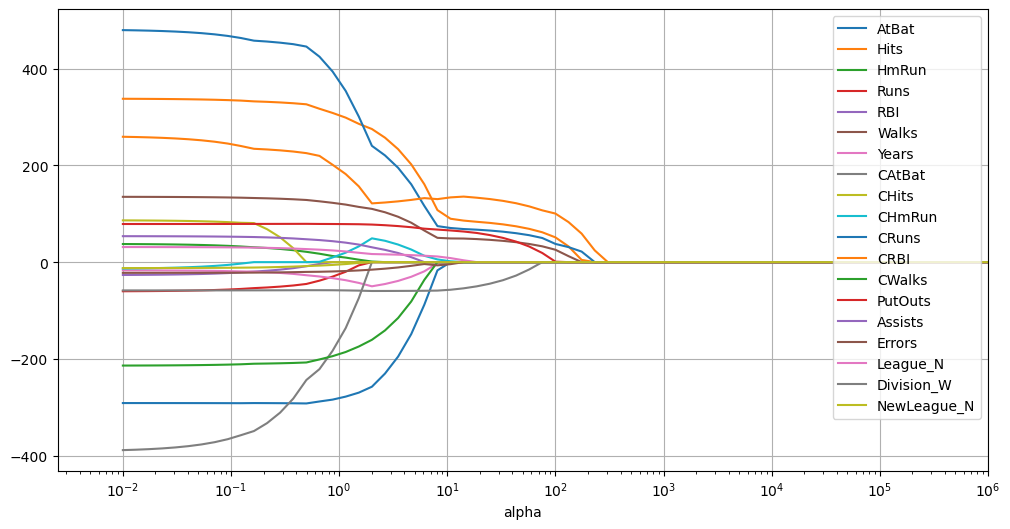

In [29]:
df.plot(figsize=(12,6),grid=True,logx=True,xlim = (0.00,10**6))
plt.legend(loc='upper right');

In [30]:
# coefficients shrink to zero as alpha values increase

In [31]:
np.set_printoptions(suppress=True)

### Holdout Cross Validation with alpha known

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.5,
                                                 random_state=1)

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### fit model with alpha = 4

In [34]:
lasso2 = Lasso(alpha=4)
lasso2.fit(X_train_scaled, y_train)
pred2 = lasso2.predict(X_test_scaled)     
mspe = mean_squared_error(y_test, pred2)
mspe

105286.61132387113

#### fit model with huge alpha = 10^9

In [35]:
lasso3 = Lasso(alpha=10**9)
lasso3.fit(X_train_scaled, y_train)
pred3 = lasso3.predict(X_test_scaled)          
mspe = mean_squared_error(y_test, pred3)
mspe

172862.23592080915

In [36]:
# Huge alpha makes over-shrinking which increases test MSE
# all coeffs very close to zero

### Linear Regression (alpha = 0)

In [37]:
# cannot use Lasso(alpha=0)
# so use LinearRegression()

In [38]:
ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)
pred = ols_model.predict(X_test_scaled)          
ols_mse = mean_squared_error(y_test, pred)
ols_mse

116690.46856661158

In [39]:
# lasso(alpha=4) test MSPE smaller than OLS

### Holdout Cross Validation searching for alpha

In [40]:
X_nontest,X_test,y_nontest,y_test = train_test_split(X,y,
                                                 test_size=0.40,
                                                 random_state=1)

In [41]:
X_train,X_validation,y_train,y_validation = train_test_split(X_nontest,y_nontest,
                                                 test_size=0.5,
                                                 random_state=1)

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [43]:
lasso_model = Lasso(max_iter = 10000)

In [44]:
validation_mspes = []

for a in alphas:
    lasso_model.set_params(alpha = a)
    lasso_model.fit(X_train_scaled, y_train)
    yhat = lasso_model.predict(X_validation_scaled)
    mspe = mean_squared_error(y_validation,yhat)
    validation_mspes.append(mspe)

In [45]:
df = pd.DataFrame(validation_mspes,
                  columns = ['Valid_MSE'])
df.index = alphas
df.index.name = 'alpha'
df

,Valid_MSE
alpha,
1.000000e+10,161825.800308
7.564633e+09,161825.800308
5.722368e+09,161825.800308
4.328761e+09,161825.800308
3.274549e+09,161825.800308
...,...
3.053856e-02,112731.183827
2.310130e-02,112783.012264
1.747528e-02,112822.687475


In [46]:
min1 = df.Valid_MSE.min()
min1

77542.23372579267

In [47]:
df[df.Valid_MSE == min1]

,Valid_MSE
alpha,
57.223677,77542.233726


In [48]:
# best alpha giving min Validation MSE
best_alpha = df.Valid_MSE.idxmin()
best_alpha

57.2236765935022

In [49]:
# plot MSPE vs alpha

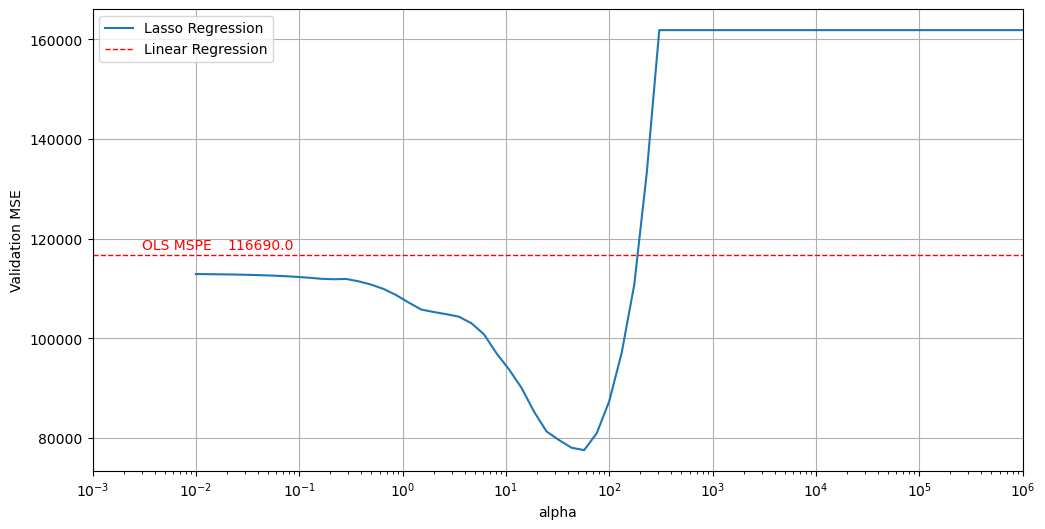

In [50]:
df.plot(figsize=(12,6),grid=True,logx=True,xlim = (0.001,10**6))
# add horizontal line with OLS MSPE
plt.axhline(y = ols_mse,linestyle = '--',c='r',linewidth=1)
plt.annotate(round(ols_mse,0),xy=(0.02,1.01*ols_mse), c='r')
plt.annotate('OLS MSPE',xy=(0.003,1.01*ols_mse), c='r')
#
plt.ylabel('Validation MSE')
plt.legend(("Lasso Regression", "Linear Regression"));

In [51]:
# Smallest Validation MSE

In [52]:
min1 = min(validation_mspes)
min1

77542.23372579267

In [53]:
validation_mspes.index(min1)

68

In [54]:
# best alpha (minimizing validation MSE)

In [55]:
alphas[68]

57.2236765935022

In [56]:
# test MSE with best alpha

In [57]:
scaler = StandardScaler()
scaler.fit(X_nontest)
X_nontest_scaled = scaler.transform(X_nontest)
X_test_scaled = scaler.transform(X_test)

In [58]:
lasso2 = Lasso(alpha = best_alpha)
lasso2.fit(X_nontest_scaled, y_nontest)
pred2 = lasso2.predict(X_test_scaled)          
mspe = mean_squared_error(y_test, pred2)
mspe

109556.92691129888

## Lasso Regression 5-fold cross validation to find best alpha

In [59]:
X_train,X_test,\
y_train,y_test = train_test_split(X,y,test_size=0.5,
                                  random_state=1)

In [60]:
X_test[:5]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
126,282.0,78.0,13.0,37.0,51.0,29.0,5.0,1649.0,453.0,73.0,211.0,280.0,138.0,670.0,57.0,5.0,0.0,1.0,0.0
13,239.0,60.0,0.0,30.0,11.0,22.0,6.0,1941.0,510.0,4.0,309.0,103.0,207.0,121.0,151.0,6.0,0.0,0.0,0.0
207,490.0,148.0,14.0,64.0,78.0,49.0,13.0,3400.0,1000.0,113.0,445.0,491.0,301.0,0.0,0.0,0.0,0.0,0.0,1.0
221,576.0,167.0,8.0,89.0,49.0,57.0,4.0,822.0,232.0,19.0,132.0,83.0,79.0,325.0,12.0,8.0,1.0,0.0,1.0
68,521.0,142.0,20.0,67.0,86.0,45.0,4.0,815.0,205.0,22.0,99.0,103.0,78.0,107.0,242.0,23.0,0.0,0.0,0.0


In [61]:
y_test[:5]

126    500.0
13     700.0
207    700.0
221    210.0
68     105.0
Name: Salary, dtype: float64

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X_test_scaled[:1]

array([[-0.75403349, -0.59086622,  0.20177987, -0.63314908, -0.00973381,
        -0.45405721, -0.50193827, -0.42197414, -0.40314783,  0.01162816,
        -0.43551916, -0.17330772, -0.4452582 ,  1.27997267, -0.33878194,
        -0.44171974, -1.03892496,  0.99239533, -1.00766295]])

In [64]:
scaler = StandardScaler()
model = Lasso(max_iter = 10000)
pipe1 = Pipeline([('scaler', scaler),('lasso', model)])

In [65]:
param_grid = {'lasso__alpha': alphas}

In [66]:
lassocv = GridSearchCV(pipe1,param_grid,cv = 5,
                       scoring = 'neg_mean_squared_error')
lassocv.fit(X_train, y_train);

In [67]:
# best alpha (minimizing validation MSE)

In [68]:
lassocv.best_params_

{'lasso__alpha': 32.745491628777316}

In [69]:
alpha1 = lassocv.best_params_['lasso__alpha']
alpha1

32.745491628777316

In [70]:
# test MSE with best alpha

In [71]:
# fit lasso model with best alpha
lasso1 = Lasso(alpha = alpha1)
lasso1.fit(X_train_scaled,y_train);

In [72]:
yhat = lasso1.predict(X_test_scaled)
best_mspe = mean_squared_error(y_test, yhat)
best_mspe

105405.44883970029

In [73]:
# coefficients of best lasso model

df4 = pd.DataFrame(lasso1.coef_,index=X.columns,
                   columns=['lasso_coeff'])
df4

,lasso_coeff
AtBat,0.000000
Hits,47.461295
HmRun,0.000000
Runs,0.000000
RBI,1.279976
Walks,64.820579
Years,0.000000
CAtBat,0.000000
CHits,0.000000
CHmRun,16.730628


In [74]:
df4[df4.lasso_coeff != 0]

,lasso_coeff
Hits,47.461295
RBI,1.279976
Walks,64.820579
CHmRun,16.730628
CRBI,179.522896
PutOuts,107.689142
Division_W,-39.374659


### predict salary of first player in test set

In [75]:
X_test[:1]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
126,282.0,78.0,13.0,37.0,51.0,29.0,5.0,1649.0,453.0,73.0,211.0,280.0,138.0,670.0,57.0,5.0,0.0,1.0,0.0


In [76]:
newval = X_test_scaled[:1]
newval

array([[-0.75403349, -0.59086622,  0.20177987, -0.63314908, -0.00973381,
        -0.45405721, -0.50193827, -0.42197414, -0.40314783,  0.01162816,
        -0.43551916, -0.17330772, -0.4452582 ,  1.27997267, -0.33878194,
        -0.44171974, -1.03892496,  0.99239533, -1.00766295]])

In [77]:
lasso1.predict(newval)

array([543.06680376])

In [78]:
y_test[:1]

126    500.0
Name: Salary, dtype: float64